In [1]:
using Pkg
Pkg.activate("./")

 Activating environment at `/global/u2/d/dccombs/NDP/SSD/Project.toml`


In [2]:
Pkg.add(PackageSpec(path="/global/homes/d/dccombs/SolidStateDetectors.jl/"))

   Updating git-repo `/global/u2/d/dccombs/SolidStateDetectors.jl`


   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `/global/u2/d/dccombs/NDP/SSD/Project.toml`
 [no changes]
   Updating `/global/u2/d/dccombs/NDP/SSD/Manifest.toml`
 [no changes]


In [22]:
using SolidStateDetectors
using Plots; pyplot(fmt = :png)
using Unitful

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


In [4]:
T = Float32
sim = Simulation{T}(SSD_examples[:Hexagon])

Simulation{Float32} - Coordinate system: cartesian
  Detector: Simple Si Hexagon
  Electric potential: missing
  Charge density: missing
  Fix Charge density: missing
  Dielectric distribution: missing
  Point types: missing
  Electric field: missing
  Weighting potentials: 
    Contact 1: 

missing
    Contact 2: missing
  Charge drift model: missing
  Electron drift field: missing
  Hole drift field: missing


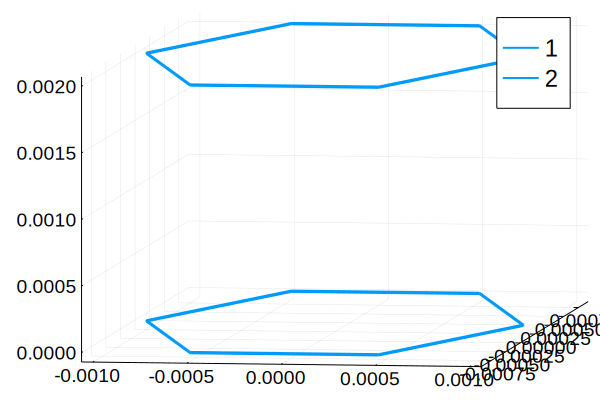

In [5]:
plot(sim.detector)

In [5]:
calculate_electric_potential!(sim)

Electric Potential Calculation
Bias voltage: 150.0 V
Precision: Float32
Convergence limit: 1.0e-7 => 1.5e-5 V
Threads: 1
Coordinate system: cartesian
Initial grid dimension: (12, 11, 12)
Refine? -> true
Refinement parameters:
	maximum number of refinements: 3
	minimum grid spacing:
		r: 1.0e-5 m
		φ: 1.0e-5 rad
		z: 1.0e-5 m
	Refinement limits:
		r: 1.0e-5 -> 0.0015 V
		φ: 1.0e-5 -> 0.0015 V
		z: 1.0e-5 -> 0.0015 V



Convergence:  (thresh = 1.5e-05, value = 2.28882e-05)┌ Info: Maximum number of iterations reached. (`n_iterations = 50504`)
└ @ SolidStateDetectors /global/homes/d/dccombs/.julia/packages/SolidStateDetectors/8xfWR/src/PotentialSimulation/ConvergenceAndRefinement.jl:57
Convergence:  Time: 0:00:09 (9 iterations)
┌ Info: New Grid Size = (22, 21, 21)
└ @ SolidStateDetectors /global/homes/d/dccombs/.julia/packages/SolidStateDetectors/8xfWR/src/Simulation/Simulation.jl:466
Convergence:  Time: 0:00:06 (12 iterations)e-05)
┌ Info: New Grid Size = (42, 41, 39)
└ @ SolidStateDetectors /global/homes/d/dccombs/.julia/packages/SolidStateDetectors/8xfWR/src/Simulation/Simulation.jl:466
Convergence:  Time: 0:00:08 (23 iterations)e-05)
┌ Info: New Grid Size = (82, 81, 75)
└ @ SolidStateDetectors /global/homes/d/dccombs/.julia/packages/SolidStateDetectors/8xfWR/src/Simulation/Simulation.jl:466
Convergence:  Time: 0:00:32 (83 iterations)6646)


In [6]:
calculate_electric_field!(sim)

In [7]:
charge_drift_model = ADLChargeDriftModel()

ADLChargeDriftModel{Float32}(SolidStateDetectors.CarrierParameters{Float32}(SolidStateDetectors.VelocityParameters{Float32}(3.8609f0, 0.805f0, 51100.0f0, -0.0171f0), SolidStateDetectors.VelocityParameters{Float32}(3.8536f0, 0.641f0, 53800.0f0, 0.051f0)), SolidStateDetectors.CarrierParameters{Float32}(SolidStateDetectors.VelocityParameters{Float32}(6.1824f0, 0.942f0, 18500.0f0, 0.0f0), SolidStateDetectors.VelocityParameters{Float32}(6.1215f0, 0.662f0, 18200.0f0, 0.0f0)), SolidStateDetectors.MassParameters{Float32}(1.64f0, 0.0819f0), -0.785398f0, StaticArrays.SArray{Tuple{3,3},Float32,2,L} where L[[8.343261 -3.8667529 3.866751; -3.8667529 8.343259 3.8667524; 3.866751 3.8667524 8.343261], [8.343259 3.8667524 3.8667514; 3.8667524 8.343259 -3.8667514; 3.866752 -3.866752 8.343261], [8.34326 -3.8667529 -3.8667514; -3.8667524 8.343259 -3.866752; -3.866751 -3.866752 8.343261], [8.343259 3.8667529 -3.8667524; 3.8667529 8.343261 3.866751; -3.8667524 3.866751 8.343261]], No temperature model defin

In [8]:
set_charge_drift_model!(sim, charge_drift_model)

In [9]:
calculate_drift_fields!(sim)

In [10]:
for contact in sim.detector.contacts
    calculate_weighting_potential!(sim, contact.id, verbose = false)
end

Convergence:  (thresh = 1e-07, value = 2.08616e-07)┌ Info: Maximum number of iterations reached. (`n_iterations = 50504`)
└ @ SolidStateDetectors /global/homes/d/dccombs/.julia/packages/SolidStateDetectors/8xfWR/src/PotentialSimulation/ConvergenceAndRefinement.jl:57
Convergence:  Time: 0:00:07 (9 iterations)
Convergence:  Time: 0:00:05 (12 iterations)07)
Convergence:  Time: 0:00:07 (24 iterations)07)
Convergence:  Time: 0:00:33 (97 iterations)06)
Convergence:  (thresh = 1e-07, value = 2.38419e-07)┌ Info: Maximum number of iterations reached. (`n_iterations = 50504`)
└ @ SolidStateDetectors /global/homes/d/dccombs/.julia/packages/SolidStateDetectors/8xfWR/src/PotentialSimulation/ConvergenceAndRefinement.jl:57
Convergence:  Time: 0:00:06 (9 iterations)
Convergence:  Time: 0:00:05 (12 iterations)07)
Convergence:  Time: 0:00:06 (23 iterations)07)
Convergence:  Time: 0:00:27 (81 iterations)06)


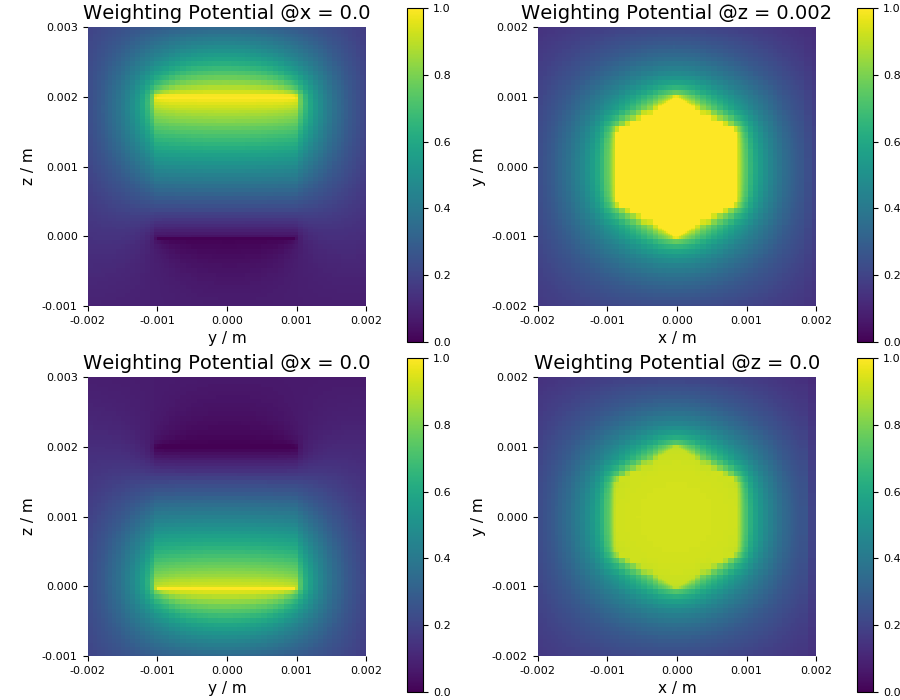

In [97]:
plot(
plot(sim.weighting_potentials[1],x=0,xlims=(-0.002,0.002),ylims=(-0.001,0.003)),
plot(sim.weighting_potentials[1],z=0.002,xlims=(-0.002,0.002),ylims=(-0.002,0.002)),
plot(sim.weighting_potentials[2],x=0,xlims=(-0.002,0.002),ylims=(-0.001,0.003)),
plot(sim.weighting_potentials[2],z=0,xlims=(-0.002,0.002),ylims=(-0.002,0.002)),
size = (900, 700))

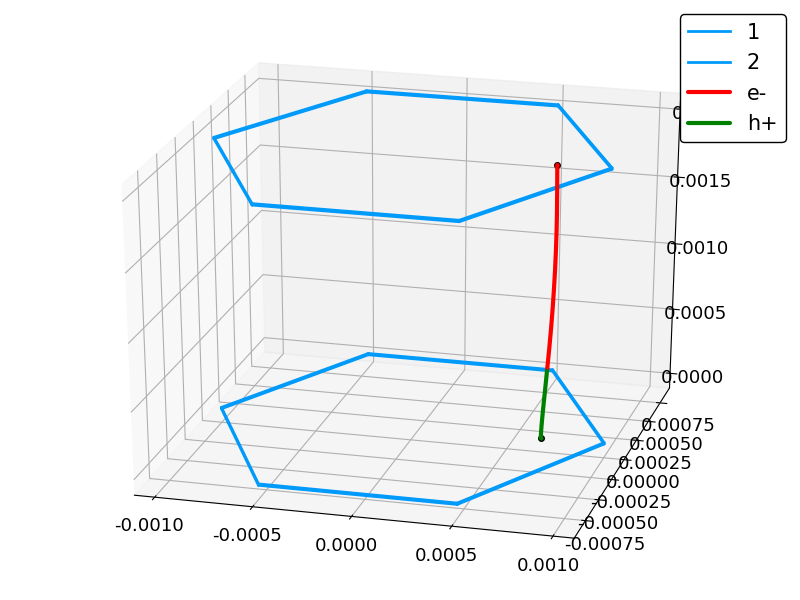

In [98]:
starting_positions = [ CartesianPoint{T}( 0.0007, 0, 0.0005 )]
energy_depos = T[700] * u"keV" # are needed later in the signal generation

event = Event(starting_positions, energy_depos);

time_step = 0.1u"ns"
drift_charges!(event, sim, Δt = time_step)
plot(sim.detector, size = (800, 600))
plot!(event.drift_paths)

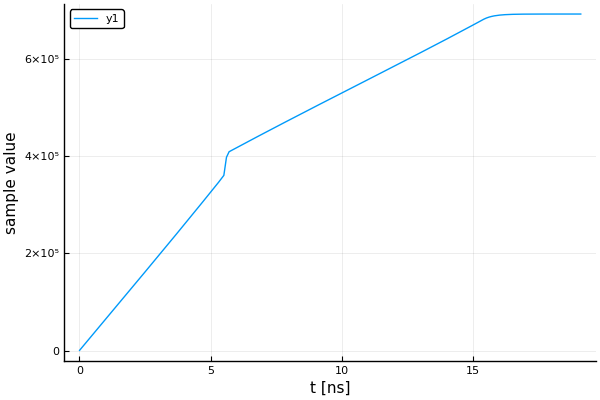

In [99]:
simulate!(event, sim, Δt=time_step)
plot(event.waveforms[2])

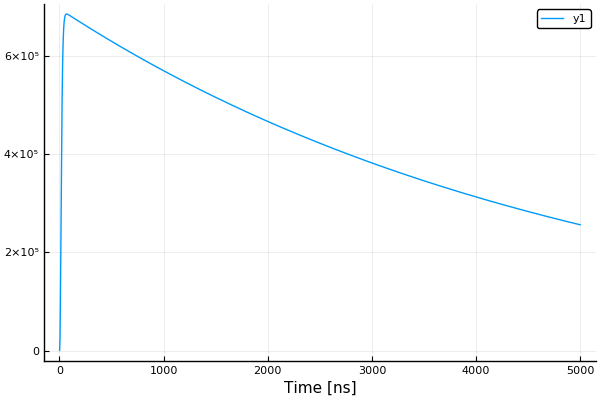

In [95]:
wave = event.waveforms[2]

# extend the waveform to have more samples
win = [v for v in wave.value]
stop = 50000
for i in 193:stop
    push!(win,win[192])
end

# filter time constants from Aaron Jezghani's thesis
# CR filter with τ = 5μs
wout1 = [0.0]
tau1 = 5e-6
dt = 0.1e-9
a1 = tau1/(tau1+dt)
for i in 2:stop
    push!(wout1, a1*(wout1[i-1] + win[i] - win[i-1]))
end

# RC filter with τ = 7ns
wout2 = [0.0]
tau2 = 7e-9
a2 = dt/(tau2+dt)
for i in 2:stop
    push!(wout2, a2*(wout1[i] - wout2[i-1]) + wout2[i-1])
end

# RC filter with τ = 7ns
wout3 = [0.0]
for i in 2:stop
    push!(wout3, a2*(wout2[i] - wout3[i-1]) + wout3[i-1])
end

x = [i*dt*1e9 for i in 0:stop-1]
plot(x,wout3,xlabel="Time [ns]")